# Weather and how it relates to cities location

## Prepare Data

In [48]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests

from scipy import stats

# Import keys.
from api_keys import weather_api_key
from api_keys import g_key

# Dataset location.
cities_json_file_path = os.path.join('Resources', 'city.list.json')


In [49]:
# Read cities dataset.
cities_df = pd.read_json(cities_json_file_path)

cities_coordinates = pd.json_normalize(cities_df['coord'])

cities_df = cities_df.merge(cities_coordinates, left_index=True, right_index=True)
cities_df.drop(columns=['coord'], inplace=True)

cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209579 entries, 0 to 209578
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       209579 non-null  int64  
 1   name     209579 non-null  object 
 2   state    209579 non-null  object 
 3   country  209579 non-null  object 
 4   lon      209579 non-null  float64
 5   lat      209579 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.6+ MB


In [50]:
# Divide cities in four groups.
# Each group will be made using the main imaginary lines dividing the Earth (the Prime meridian and the Equator).

# Cities in the first quadrant (longitude is negative and latitude is positive)
first_quadrant_cities = (cities_df['lon'] < 0) & (cities_df['lat'] > 0)
first_quadrant_cities_df = cities_df.loc[first_quadrant_cities]

# Cities in the second quadrant (both longitude and latitude are positive)
second_quadrant_cities = (cities_df['lon'] > 0) & (cities_df['lat'] > 0)
second_quadrant_cities_df = cities_df.loc[second_quadrant_cities]

# Cities in the third quadrant (both longitude and latitude are negative)
third_quadrant_cities = (cities_df['lon'] < 0) & (cities_df['lat'] < 0)
third_quadrant_cities_df = cities_df.loc[third_quadrant_cities]

# Cities in the fourth quadrant (longitude is positive and latitude is negative)
fourth_quadrant_cities = (cities_df['lon'] > 0) & (cities_df['lat'] < 0)
fourth_quadrant_cities_df = cities_df.loc[fourth_quadrant_cities]


In [51]:
# Get 500 random cities in the world
temp_df = first_quadrant_cities_df.sample(80)
five_hundred_cities = pd.DataFrame(temp_df)

temp_df = second_quadrant_cities_df.sample(80)
five_hundred_cities = five_hundred_cities.append(temp_df)

temp_df = third_quadrant_cities_df.sample(80)
five_hundred_cities = five_hundred_cities.append(temp_df)

temp_df = fourth_quadrant_cities_df.sample(80)
five_hundred_cities = five_hundred_cities.append(temp_df)

five_hundred_cities.reset_index(inplace=True)


## Start calculations and building plots

In [52]:
# Get weather data for all 500 random cities

# Weather API configuration
weather_api_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
weather_data_for_a_city_url = f"{weather_api_url}appid={weather_api_key}&units={units}"

# Loop through the list of cities and perform a request for data on each
for index, city in five_hundred_cities.iterrows(): 
    lat_param = f"&lat={city['lat']}"
    lon_param = f"&lon={city['lon']}"
    
    # Include a print log of each city as it's being processed with the city number and city name.
    print(f"Getting weather information for: {city['id']} - {city['name']}, {city['country']} ... ")
    response = requests.get(weather_data_for_a_city_url + lat_param + lon_param).json()
    print(f"information retrieved.")

    temperature = response['main']['temp']
    humidity = response['main']['humidity']
    cloudiness = response['clouds']['all']
    wind_speed = response['wind']['speed']
    weather_condition = response['weather'][0]['main']
    weather_condition_desc = response['weather'][0]['description']
    
    five_hundred_cities.loc[index, 'temperature'] = temperature
    five_hundred_cities.loc[index, 'humidity'] = humidity
    five_hundred_cities.loc[index, 'cloudiness'] = cloudiness
    five_hundred_cities.loc[index, 'wind_speed'] = wind_speed
    five_hundred_cities.loc[index, 'weather_condition'] = weather_condition
    five_hundred_cities.loc[index, 'weather_condition_desc'] = weather_condition_desc

print(five_hundred_cities.info())

Getting weather information for: 4901730 - McLean County, US ... 
information retrieved.
Getting weather information for: 3118472 - Lezama, ES ... 
information retrieved.
Getting weather information for: 6162830 - Tennion, CA ... 
information retrieved.
Getting weather information for: 7262593 - Zephyr Cove-Round Hill Village, US ... 
information retrieved.
Getting weather information for: 3124625 - Corbillos de los Oteros, ES ... 
information retrieved.
Getting weather information for: 6087732 - Newport, CA ... 
information retrieved.
Getting weather information for: 4301094 - Heritage Creek, US ... 
information retrieved.
Getting weather information for: 4420799 - Carthage, US ... 
information retrieved.
Getting weather information for: 5156270 - Granville, US ... 
information retrieved.
Getting weather information for: 3685200 - Distracción, CO ... 
information retrieved.
Getting weather information for: 8012563 - Campelos, PT ... 
information retrieved.
Getting weather information 

information retrieved.
Getting weather information for: 2661021 - Diepoldsau, CH ... 
information retrieved.
Getting weather information for: 648958 - Lapin Lääni, FI ... 
information retrieved.
Getting weather information for: 536203 - Saint Petersburg, RU ... 
information retrieved.
Getting weather information for: 6555632 - Muggensturm, DE ... 
information retrieved.
Getting weather information for: 2771277 - Mondsee, AT ... 
information retrieved.
Getting weather information for: 1268820 - Jorhāt, IN ... 
information retrieved.
Getting weather information for: 2996827 - Maffliers, FR ... 
information retrieved.
Getting weather information for: 6459313 - Tochilari, BG ... 
information retrieved.
Getting weather information for: 2936536 - Dockendorf, DE ... 
information retrieved.
Getting weather information for: 2920315 - Gippe, DE ... 
information retrieved.
Getting weather information for: 6460187 - Cherven, BG ... 
information retrieved.
Getting weather information for: 1515662 -

information retrieved.
Getting weather information for: 3933058 - Paracas, PE ... 
information retrieved.
Getting weather information for: 3660418 - Babahoyo, EC ... 
information retrieved.
Getting weather information for: 3893865 - Concón, CL ... 
information retrieved.
Getting weather information for: 3932834 - Pasco, PE ... 
information retrieved.
Getting weather information for: 3433579 - Heavy, AR ... 
information retrieved.
Getting weather information for: 3471485 - Armazém, BR ... 
information retrieved.
Getting weather information for: 6621212 - Tarabuco, BO ... 
information retrieved.
Getting weather information for: 3473817 - Porto Velho, BR ... 
information retrieved.
Getting weather information for: 3453409 - Platina, BR ... 
information retrieved.
Getting weather information for: 3832822 - Villa Aberastain, AR ... 
information retrieved.
Getting weather information for: 3832815 - Villa Allende, AR ... 
information retrieved.
Getting weather information for: 3948917 - Santo

information retrieved.
Getting weather information for: 2164911 - Gorae, AU ... 
information retrieved.
Getting weather information for: 8058053 - Kemangi, ID ... 
information retrieved.
Getting weather information for: 8058003 - Pagak Kulon, ID ... 
information retrieved.
Getting weather information for: 2152711 - Poowong East, AU ... 
information retrieved.
Getting weather information for: 1969637 - Lampa, ID ... 
information retrieved.
Getting weather information for: 7839719 - Corowa Shire, AU ... 
information retrieved.
Getting weather information for: 1091713 - Koua, KM ... 
information retrieved.
Getting weather information for: 923817 - Southern Region, MW ... 
information retrieved.
Getting weather information for: 2161976 - Kalorama, AU ... 
information retrieved.
Getting weather information for: 2073982 - Coobowie, AU ... 
information retrieved.
Getting weather information for: 1621680 - Wedarijaksa, ID ... 
information retrieved.
Getting weather information for: 3347853 - L

In [53]:
five_hundred_cities

,index,id,name,state,country,lon,lat,temperature,humidity,cloudiness,wind_speed,weather_condition,weather_condition_desc
0,151484,4901730,McLean County,IL,US,-88.833397,40.483372,65.75,45.0,1.0,8.05,Clear,clear sky
1,115744,3118472,Lezama,,ES,-2.972570,43.027988,55.17,87.0,40.0,1.10,Clouds,scattered clouds
2,164472,6162830,Tennion,,CA,-112.585129,49.966740,54.81,62.0,75.0,12.75,Clouds,broken clouds
3,195015,7262593,Zephyr Cove-Round Hill Village,NV,US,-119.925377,38.997490,57.16,62.0,90.0,8.05,Clouds,overcast clouds
4,116928,3124625,Corbillos de los Oteros,,ES,-5.459640,42.407688,48.20,87.0,100.0,6.93,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,208011,8060707,Tireman Timur,,ID,111.371696,-6.705800,86.72,68.0,100.0,8.46,Clouds,overcast clouds
316,200519,7579579,Kedungdoro,,ID,111.950203,-8.057700,84.85,67.0,98.0,6.76,Clouds,overcast clouds
317,202721,7839655,Cleve,,AU,136.288925,-33.660782,62.20,58.0,50.0,9.57,Clouds,scattered clouds
318,203115,7850044,Datarnangka,,ID,106.848000,-7.199400,86.54,62.0,4.0,3.06,Clear,clear sky


### Scatter plots

In [71]:
# Get middle point
def get_middle_point(a_series):
    middle = ((a_series.max() + a_series.min() ) / 2)
    return middle

# Print scatter plot and save the plot as an image
def print_scatter_plot_with_regression_equation(x_series, y_series, marker, title, y_label, x_label, file_name, regress_values = None, line_eq = None):
    
    # Build scatter plot
    plt.scatter(x_series, y_series, marker = marker)
    
    if regress_values is not None:
        # Build line equation and annotate it to the scatter plot
        plt.plot(x_series, regress_values, "r-")
        plt.annotate(line_eq, (get_middle_point(x_series), get_middle_point(y_series)), fontsize = 15, color = "red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    
    # Save the figure
    plt.savefig("output/" + file_name)
    
    # Show plot
    plt.show()

# Perform linear regression. Return regressed values, the linear equation and the r-value
def linear_regression_with_equation(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    return regress_values, line_equation

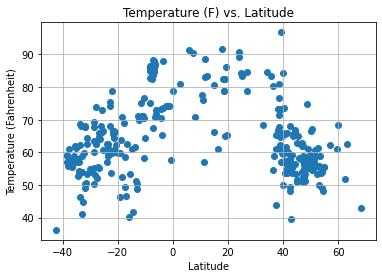

In [72]:
# Temperature (F) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["temperature"],
    "o",
    "Temperature (F) vs. Latitude",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude.png"
)

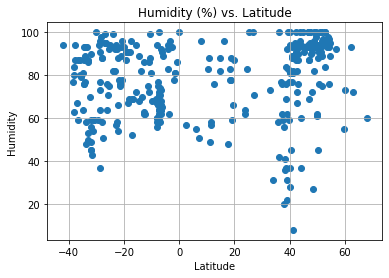

In [56]:
# Humidity (%) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["humidity"],
    "o",
    "Humidity (%) vs. Latitude",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude.png"
)

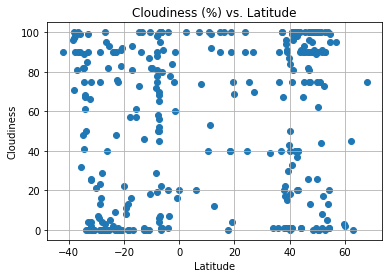

In [57]:
# Cloudiness (%) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude.png"
)

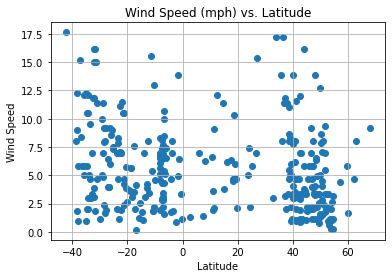

In [58]:
# Wind Speed (mph) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude.png"
)

### Linear regression calculation by Hemisphere plots

In [59]:
# Divide cities by hemispheres

northern_hemisphere_df = five_hundred_cities.loc[five_hundred_cities['lat'] > 0]
southern_hemisphere_df = five_hundred_cities.loc[five_hundred_cities['lat'] < 0]


The r-squared is: 0.46797870691232263


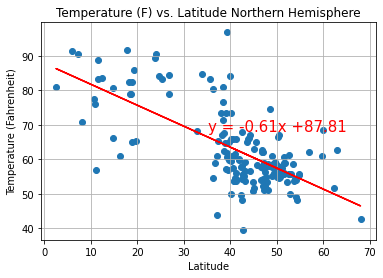

The r-squared is: 0.45623035476008544


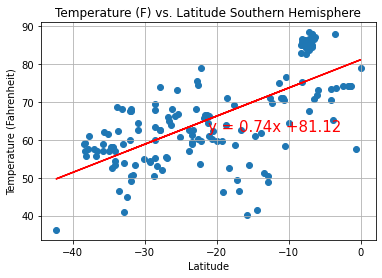

In [60]:
# Perform a linear regression on temperature vs. latitude for the northern hemisphere

(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["temperature"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["temperature"],
    "o",
    "Temperature (F) vs. Latitude Northern Hemisphere",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on temperature vs. latitude for the southern hemisphere

(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["temperature"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["temperature"],
    "o",
    "Temperature (F) vs. Latitude Southern Hemisphere",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude-SH.png",
    regress_values,
    line_eq
)


The r-squared is: 0.07384162821600958


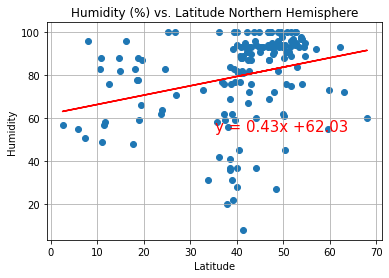

The r-squared is: 3.306826814661245e-05


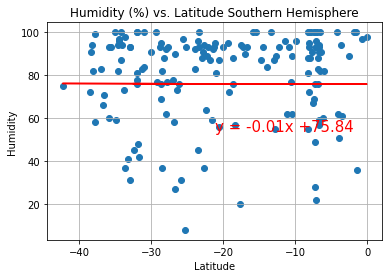

In [61]:
# Perform a linear regression on Humidity (%) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["humidity"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["humidity"],
    "o",
    "Humidity (%) vs. Latitude Northern Hemisphere",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Humidity (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["humidity"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["humidity"],
    "o",
    "Humidity (%) vs. Latitude Southern Hemisphere",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude-SH.png",
    regress_values,
    line_eq
)

The r-squared is: 0.002533742872125294


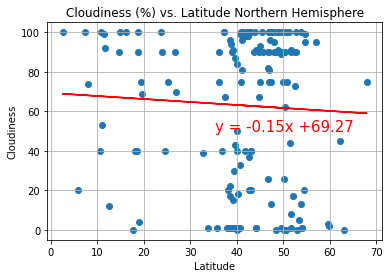

The r-squared is: 0.002341466363392122


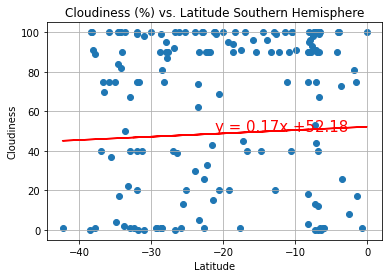

In [62]:
# Perform a linear regression on Cloudiness (%) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["cloudiness"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude Northern Hemisphere",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Cloudiness (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["cloudiness"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude Southern Hemisphere",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude-SH.png",
    regress_values,
    line_eq
)

The r-squared is: 0.03128563307232766


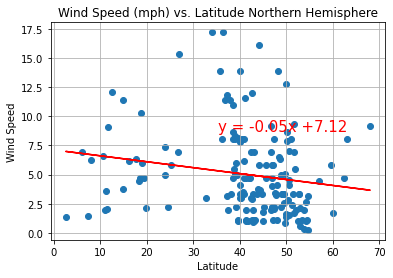

The r-squared is: 0.06414041925665731


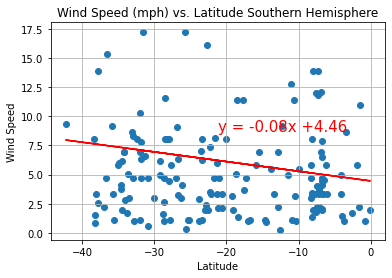

In [63]:
# Perform a linear regression on Wind Speed (mph) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["wind_speed"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude Northern Hemisphere",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Wind Speed (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["wind_speed"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude Southern Hemisphere",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude-SH.png",
    regress_values,
    line_eq
)